# Part I - Prosper Loan Data Exploration
## by Emmanuel Obeng

## Introduction
> This data set contains 113,937 loans from Prosper Funding LLC with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.

> The dataset is one of Udacity's curated databases and was obtained from this [link](https://s3.amazonaws.com/udacity-hosted-downloads/ud651/prosperLoanData.csv.)



## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline

> We load in our dataset and describe it's properties in this section


In [2]:
# Loading the loan dataset into a dataframe
loan_df = pd.read_csv("prosperLoanData.csv")

In [3]:
# Overview of the dataset loaded
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
ListingKey                             113937 non-null object
ListingNumber                          113937 non-null int64
ListingCreationDate                    113937 non-null object
CreditGrade                            28953 non-null object
Term                                   113937 non-null int64
LoanStatus                             113937 non-null object
ClosedDate                             55089 non-null object
BorrowerAPR                            113912 non-null float64
BorrowerRate                           113937 non-null float64
LenderYield                            113937 non-null float64
EstimatedEffectiveYield                84853 non-null float64
EstimatedLoss                          84853 non-null float64
EstimatedReturn                        84853 non-null float64
ProsperRating (numeric)                84853 non-null float64
ProsperRating (Alpha) 

In [4]:
loan_df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [5]:
loan_df.shape

(113937, 81)

### What is the structure of your dataset?

> The dataset contains information on 113,937 loans with 81 different variables about each loan. 

### What is/are the main feature(s) of interest in your dataset?

> I am most interested in understanding key features/variables that affect the expected returns on loans and the borrower APR. I would also seek to understand the relationship between these features. 

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I believe the following key features will be relevant in my investigation:
1. **Term**: The length of the loan expressed in months.
2. **IncomeRange**:The income range of the borrower at the time the listing was created.
3. **CreditGrade**: The Credit rating that was assigned at the time the listing went live. Applicable for listings pre-2009 period and will only be populated for those listings.
4. **Prosperrating (Alpha)**: The Prosper Rating assigned at the time the listing was created between AA - HR.  Applicable for loans originated after July 2009.
5. **DebtToIncomeRatio**: The debt to income ratio of the borrower at the time the credit profile was pulled. This value is Null if the debt to income ratio is not available. This value is capped at 10.01 (any debt to income ratio larger than 1000% will be returned as 1001%).
6. **BorrowerAPR**: The Borrower's Annual Percentage Rate (APR) for the loan.
7. **Estimatedreturn**: The estimated return assigned to the listing at the time it was created. Estimated return is the difference between the Estimated Effective Yield and the Estimated Loss Rate. Applicable for loans originated after July 2009.

## Univariate Exploration

> In this section, we investigate distributions of individual variables. 

In [6]:
# Convert IncomeRange to ordered categorical data type
var_dict = {'IncomeRange': ['$100,000+', '$75,000-99,999', '$50,000-74,999', '$25,000-49,999', '$1-24,999','$0'],
             }

for var in var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True, categories = var_dict[var])
    loan_df[var] = loan_df[var].astype(ordered_var)

In [7]:
#function for distribution plots

def distributionplot(dataframe, xlabels, ylabels, barcolor, bins, titles):
    #plot size
    plt.figure(figsize = [10, 5])
    
    #describe/create the titles of the plot and style
    sns.distplot(dataframe, kde = False, bins = bins, color=barcolor)
    plt.xlabel(xlabels);
    plt.ylabel(ylabels);
    plt.title(titles);
    plt.legend();

In [8]:
#function for bar plots
def barplot(dataframe, x, xlabels, ylabels, palette, titles):
    #plot size
    plt.figure(figsize = [10, 5])
    
    #describe/create the titles of the plot and style
    sns.countplot(data = dataframe, x = x, palette = palette)
    plt.xlabel(xlabels)
    plt.ylabel(ylabels)
    plt.title(titles);

In [9]:
#function for scatter plots
def scatterplot(dataframe, x, y, xlabels, ylabels, alpha, color, titles):
    #plot size
    plt.figure(figsize = [10, 5])
    
    #describe/create the titles of the plot and style
    plt.scatter(data = dataframe, x =x, y = y, alpha = alpha, color=color);
    plt.xlabel(xlabels)
    plt.ylabel(ylabels)
    plt.title(titles);
    
    correlation = loan_df[x].corr(loan_df[y])
    
    print("The correlation between " + xlabels + " and " + ylabels + " is " + str(correlation))

We begin by exploring our key outputs. The **Estimated Returns** of the Loan and the **Borrower APR**. We will further proceed to explore the key variables of interest

#### Estimated Returns:
 The estimated returns of the Loan at the time they posted the listing.

What is the distribution of the estimated returns of the loans granted?

In [10]:
# explore the Estimated Returns of Loans granted
loan_df.EstimatedReturn.describe()

count    84853.000000
mean         0.096068
std          0.030403
min         -0.182700
25%          0.074080
50%          0.091700
75%          0.116600
max          0.283700
Name: EstimatedReturn, dtype: float64

In [11]:
# identify empty Estimated Returns cells
loan_df.EstimatedReturn.isnull().sum()

29084

In [12]:
# drop rows with empty Estimated Return cells
loan_df = loan_df[loan_df['EstimatedReturn'].notnull()]

In [13]:
# updated shape of the dataset loaded
loan_df.shape

(84853, 81)

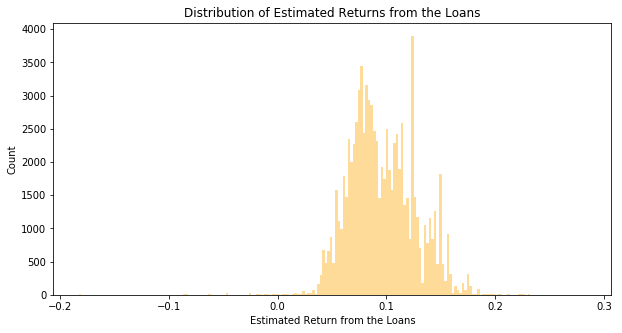

In [14]:
#plot the distribution of the Estimated Returns
distributionplot (loan_df.EstimatedReturn, 'Estimated Return from the Loans', 'Count', 'Orange', 200, 'Distribution of Estimated Returns from the Loans')

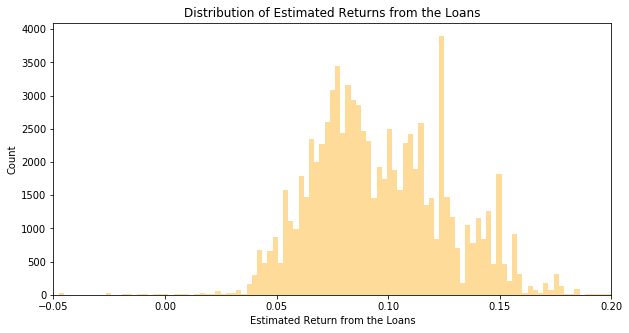

In [15]:
#zoom into plot
distributionplot (loan_df.EstimatedReturn, 'Estimated Return from the Loans', 'Count', 'Orange', 200, 'Distribution of Estimated Returns from the Loans')
plt.xlim(-.05, 0.2);

The distribution of the Estimated Returns skewed to the right with the highest peak around 12%. From the distribution, we notice that most Loans are estimated to make returns between 4% to a little above 15%

#### Borrower Annual Percentage Rate (APR):
The annual cost of loan to the borrower at the time they posted the listing.

What is the distribution of the Borrower APR like?

In [16]:
# Exploring the Borrower's Annual Percentage Rate (APR) for the loan.
loan_df.BorrowerAPR.describe()

count    84853.000000
mean         0.226658
std          0.079916
min          0.045830
25%          0.163280
50%          0.219450
75%          0.292540
max          0.423950
Name: BorrowerAPR, dtype: float64

In [17]:
# identify empty BorrowerAPR cells
loan_df.BorrowerAPR.isnull().sum()

0

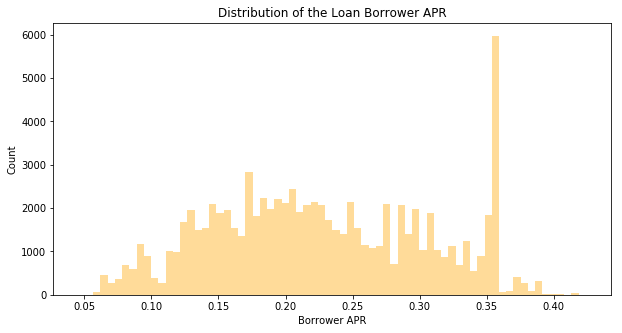

In [18]:
#plot the distribution of the BorrowerAPR
distributionplot (loan_df.BorrowerAPR, 'Borrower APR', 'Count', 'Orange', 70, 'Distribution of the Loan Borrower APR')

The distribution of the Borrower APR is mutimodal with the highest peak around 35%. There are also lesser peaks around 13%, 17%, 22% and 30%. 


What are the distributions of other key variables? We would explore the spread of the Loan Term next

#### Loan Term: 
The length of the loan expressed in months

What is the spread of period of time that borrowers of Prosper Loans normally agreed to repay their loans by? 

In [19]:
# Exploring the Loan Terms for the loans taken.
loan_df.Term.describe()

count    84853.000000
mean        42.486135
std         11.640346
min         12.000000
25%         36.000000
50%         36.000000
75%         60.000000
max         60.000000
Name: Term, dtype: float64

The minimum amount of months taken for a loan was 12 months and the highest was 60 months. However, most loans seem to have been taken for a period of 36 months. We would visualise this on a histogram to better explore this spread

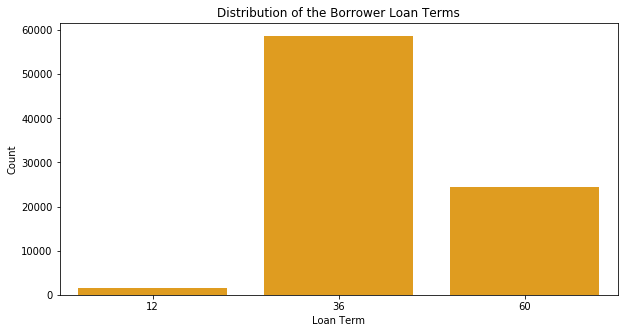

In [20]:
# plot the distribution of the Loan Term 
fig = plt.figure(figsize=(10,5))
sns.countplot(x='Term', data=loan_df, color='Orange')
plt.title('Distribution of the Borrower Loan Terms')
plt.xlabel('Loan Term')
plt.ylabel('Count')
plt.show()

From the graph above, we identify that loans were given out on only three terms, a 12 month, 36 month and 60 month terms respectively. Most loans were taken on a **36 month** basis with close to **60,000** loans taken on this repayment term. The next loan term many loans were taken by was a **60 month term** with about **25,000 loans** taken on this term. Finally, the least term by which loans were borrowed was a **12 month term**. There were roughly a **1,000 loans** taken on a **12 month repayment term** 

#### Credit Grade:
The credit grades of the borrowers at the time they posted the listing.

What is the distribution of the Credit Grade like for people who have loans?

In [21]:
# explore the credit grades for the borrowers.
loan_df.CreditGrade.value_counts()

Series([], Name: CreditGrade, dtype: int64)

In [22]:
# explore the prosper rating for the borrowers
loan_df["ProsperRating (Alpha)"].value_counts(), loan_df["ProsperRating (Alpha)"].describe()

(C     18345
 B     15581
 A     14551
 D     14274
 E      9795
 HR     6935
 AA     5372
 Name: ProsperRating (Alpha), dtype: int64, count     84853
 unique        7
 top           C
 freq      18345
 Name: ProsperRating (Alpha), dtype: object)

The Prosper Rating was assigned at the time the listing was created and is applicable for loans generated after July 2009, while the Credit Grade is applicable for loans prior to July 2009. 

For the purpose of our analysis, we would merge both ratings to arrive at one credit rating for all borrowers

In [23]:
# the lower grades, NC and HR which are present in the original credit rating but not the new prosper rating will be replaced by the least grade in the Prosper rating, E to ensure consistency
loan_df['CreditGrade'].replace(['NC', 'HR'], 'E', inplace = True)

# fill NA with empty strings
loan_df['ProsperRating (Alpha)'].fillna("", inplace = True)
loan_df['CreditGrade'].fillna("", inplace = True)

# merge both ratings
loan_df['UpdatedProsperRating'] = loan_df['ProsperRating (Alpha)'] + loan_df['CreditGrade']

In [24]:
# identify empty UpdatedProsperRating cells
loan_df.query('UpdatedProsperRating ==""').UpdatedProsperRating.count()

0

In [25]:
# drop rows with empty UpdatedProsperRating cells
loan_df = loan_df.query(' UpdatedProsperRating != ""')

In [26]:
# updated shape of the dataset loaded
loan_df.shape

(84853, 82)

We will now plot the distribution of the merged credit ratings

In [27]:
# convert the UpdatedProsperRating into ordered categorical types
categorical_rating = ['AA', 'A', 'B', 'C', 'D', 'E']
ordered_var = pd.api.types.CategoricalDtype(ordered = True, categories = categorical_rating)
loan_df['UpdatedProsperRating'] = loan_df['UpdatedProsperRating'].astype(ordered_var)


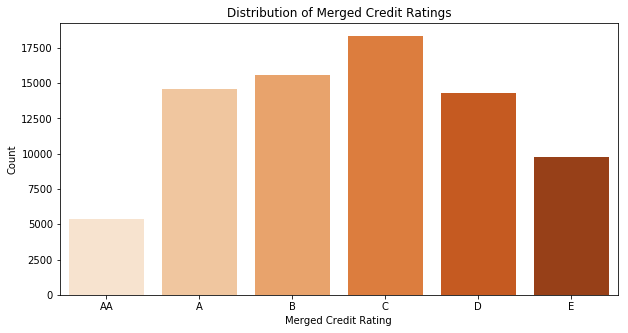

In [28]:
# ploting a bar chart of credit ratings
barplot(loan_df, 'UpdatedProsperRating', 'Merged Credit Rating', 'Count', 'Oranges', 'Distribution of Merged Credit Ratings');

We notice that the credit ratings are skewed towards the right. This will imply that more loans were given to borrowers with relatively bad credit ratings. But what could be the reason? We would explore this feature against other features to identify possible correlations

#### Income Range:
The income range of the borrower at the time they posted the listing.

What is the loan distribution with regard to income ranges

In [29]:
# explore the Income Range of Borrowers.
loan_df.IncomeRange.describe(), loan_df.IncomeRange.value_counts()

(count              84204
 unique                 6
 top       $50,000-74,999
 freq               25627
 Name: IncomeRange, dtype: object, $50,000-74,999    25627
 $25,000-49,999    24175
 $100,000+         15205
 $75,000-99,999    14498
 $1-24,999          4654
 $0                   45
 Name: IncomeRange, dtype: int64)

In [30]:
# for the purpose of this graph, categories that could not be provided will be replaced with $0 income range
loan_df['IncomeRange'].replace(['Not employed', 'Not displayed'], '$0', inplace = True)

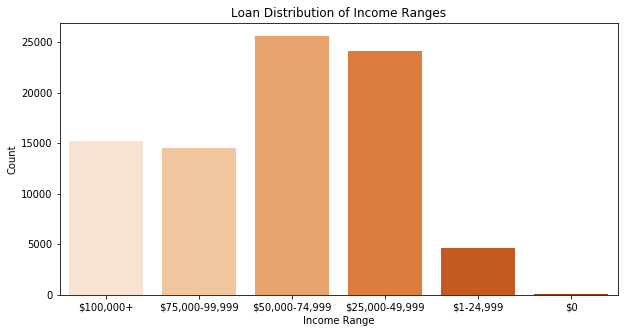

In [31]:
# ploting a bar chart of income ranges
barplot(loan_df, 'IncomeRange', 'Income Range', 'Count', 'Oranges', 'Loan Distribution of Income Ranges');

From the graph above, we notice that similar number of loans were given out to borrowers within the 100,000+ and 75,000-99,000 bracket and also the 50,000-74,999 and 25,000-49,999. Most of the loans were given out to middle ranges (50,000-74,999 and 25,000-49,999) in what seems to look like a normal distribution.

#### Debt to Income Ratio:
The debt to income ratio of the borrower at the time they posted the listing.

What is the debt to income ratio with regard to income ranges?

How did the debt of borrowers affect their ability to gain loans?

In [32]:
# explore the Debt to Income Ratio of Borrowers.
loan_df.DebtToIncomeRatio.describe()

count    77557.000000
mean         0.258752
std          0.318326
min          0.000000
25%          0.150000
50%          0.220000
75%          0.320000
max         10.010000
Name: DebtToIncomeRatio, dtype: float64

In [33]:
# identify empty Debt to Income Ratio cells
loan_df.DebtToIncomeRatio.isnull().sum()

7296

In [34]:
# drop rows with empty Debt to Income Ratio cells
loan_df = loan_df[loan_df['DebtToIncomeRatio'].notnull()]

In [35]:
# updated shape of the dataset loaded
loan_df.shape

(77557, 82)

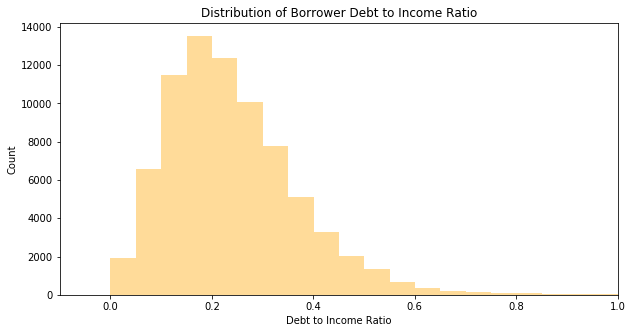

In [36]:
# plot the distribution of the Borrower Debt to Income Ratio 
distributionplot (loan_df.DebtToIncomeRatio, 'Debt to Income Ratio', 'Count', 'Orange', 200, 'Distribution of Borrower Debt to Income Ratio')

#zoom into plot
plt.xlim(-.1, 1);

The distribution curve is skewed to the left, favoring borrowers with smaller debt to income ratios. The distribution shows that many people who received loans had a debt to income ratio of 20% while the distribution of loans reduces further down as debt to income ratio increases

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

>The key variables of interest we explored with the Estimated Returns and Borrower APR

>The distribution of the Estimated Returns was skewed to the right with the highest peak around 12%. From the distribution, we noticed that most Loans are estimated to make returns between 4% to a little above 15%

> The distribution of the Borrower APR was mutimodal with the highest peak around 35%. There were also lesser peaks around 13%, 17%, 22% and 30% which showed the cost of loans to most borrowers

> For both Estimated Returns and Borrower APR variables, we had to remove rows that had corresponding null variables.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> We explored other features which could possibly affect the Estimated Returns of the loan and the Borrower APR. Among these, we noticed had to merge the features Credit Grade and Prosperrating (Alpha) into one Credit Rating feature for fruther exploration. 

> One distribution we would be interested in futher exploring is the Merged Credit ratings which seemed to indicate that more loans were given to borrowers with relatively bad credit ratings

## Bivariate Exploration

> In this section, we investigate relationships between pairs of variables in the dataset. We probe further into the variables explored in the the univariate exploration.

### Quantitative vs. Quantitative

To begin with, we would explore a comparison of APR to the Debt to Income Ratio 

#### APR to Debt to Income Ratio

In [37]:
#confirm the shape of the dataset
loan_df.shape

(77557, 82)

The correlation between Borrower APR and Debt to Income Ratio is 0.128821983853


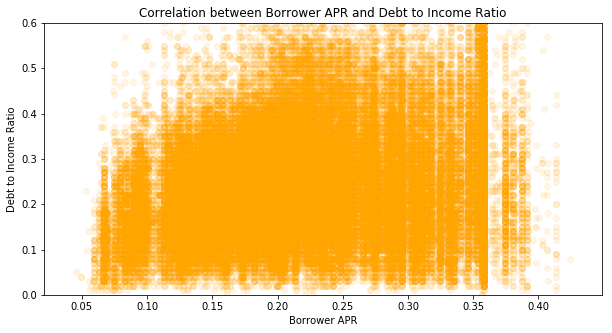

In [38]:
#plot the relation between Borrower APR and Debt to Income Ratio
scatterplot(loan_df, 'BorrowerAPR', 'DebtToIncomeRatio', 'Borrower APR', 'Debt to Income Ratio',1/10, 'Orange', "Correlation between Borrower APR and Debt to Income Ratio")
plt.ylim(0, 0.6);

From the graph above, we notice that a weak positive correlation between the Borrower APR and Debt to Income Ratio. This implies that although the Borrower APR increased with greater Debt to Income Ratio, the increase was not significant. We would compare the possible effect Debt to Income Ratio had on Estimated Returns

The correlation between Estimated Return and Debt to Income Ratio is 0.0872361661186


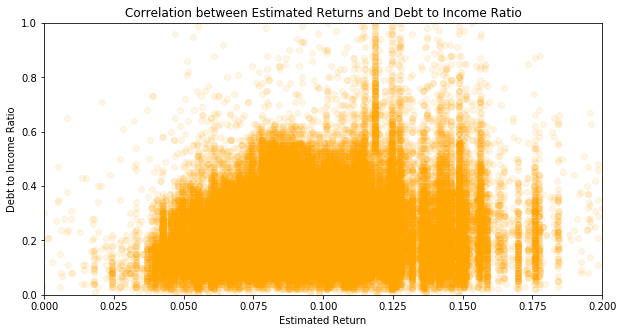

In [39]:
#plot the relation between Estimated Returns and Debt to Income Ratio
scatterplot(loan_df, 'EstimatedReturn', 'DebtToIncomeRatio', 'Estimated Return', 'Debt to Income Ratio',1/10, 'Orange', "Correlation between Estimated Returns and Debt to Income Ratio")
plt.ylim(0, 1);
plt.xlim(0.0, 0.2);

The correlation between between Estimated Returns and Debt to Income Ratio is an even weaker positive correlation in comparison to the correlation between Borrowe APR and Debt to Income Ratio. This seems to imply that the Estimated Returns from Loans taken were largely insignificant on the Debt to Income Ratio of the Borrower. 

How did BorrowerAPR relate with Estimated Returns on Loans?

The correlation between Borrower APR and Estimated Return is 0.803793863593


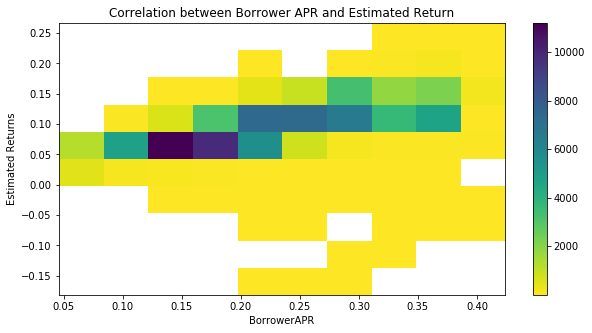

In [40]:
#plot the relation between Borrower APR and Estimated Returns
plt.figure(figsize = [10, 5])
plt.hist2d(data = loan_df,  x ='BorrowerAPR' , y = 'EstimatedReturn', cmin=0.5, cmap='viridis_r');
plt.colorbar()
plt.xlabel('BorrowerAPR')
plt.ylabel('Estimated Returns')
plt.title("Correlation between Borrower APR and Estimated Return");

correlation = loan_df['BorrowerAPR'].corr(loan_df['EstimatedReturn'])
    
print("The correlation between Borrower APR and Estimated Return is " + str(correlation))

The Heat Map above shows lower Borrower APRs are association with lower Estimated Returns. With a strong positive correlation of 0.8, the higher the Borrower APR, the more likely Prosper Loans LLC was expected to make returns on Loans given to Borrowers

### Quantitative vs. Qualitative

In this section, we would explore the relationship between categorical variables and the Borrower APRs and Estimated Returns

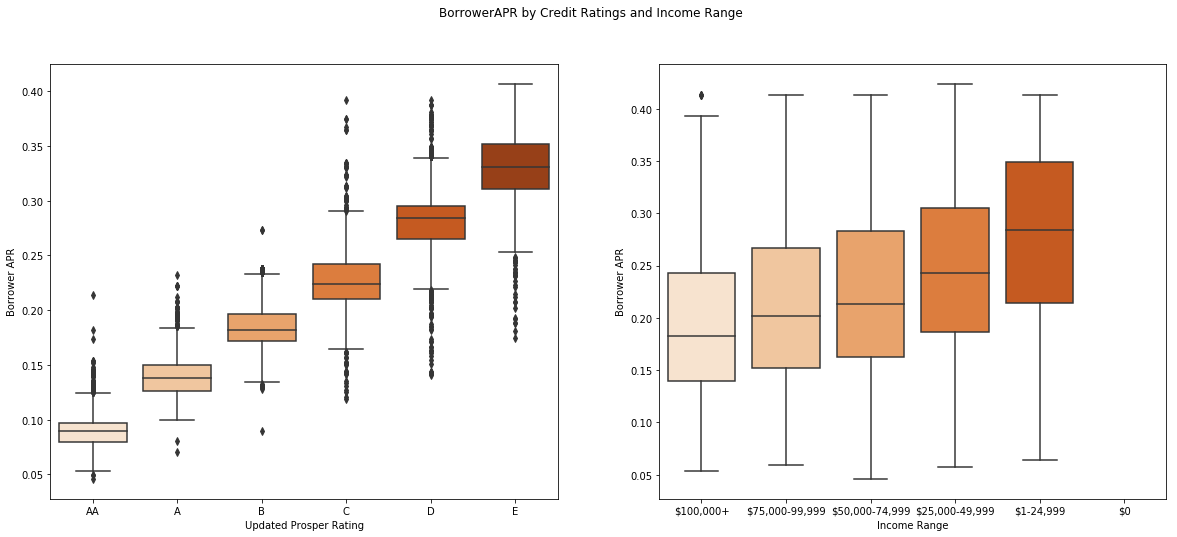

In [41]:
#plot the relation between Borrower APR and Credit Rating, and Borrower APR and Income Range
plt.figure(figsize = [20, 8])

plt.subplot(1, 2, 1)
sns.boxplot(data=loan_df, x='UpdatedProsperRating', y='BorrowerAPR', palette='Oranges')
plt.ylabel('Borrower APR')
plt.xlabel('Updated Prosper Rating')
plt.xticks(rotation=0);

plt.subplot(1, 2, 2)
sns.boxplot(data=loan_df, x='IncomeRange', y='BorrowerAPR', palette='Oranges')
plt.ylabel('Borrower APR')
plt.xlabel('Income Range')
plt.xticks(rotation=0);

plt.suptitle('BorrowerAPR by Credit Ratings and Income Range');

From these graphs above, we notice that the greater the worse the credit rating, the greater the median Borrower APR. Additionally, the lower the income range of the borrower, the greater the median Borrower APR. 

This can imply that the lower the income range of the borrower, and the worse the credit rating, the higher the risk of the loan and therefore, the higher interest rate which may lead to an increase in Borrower APR. 

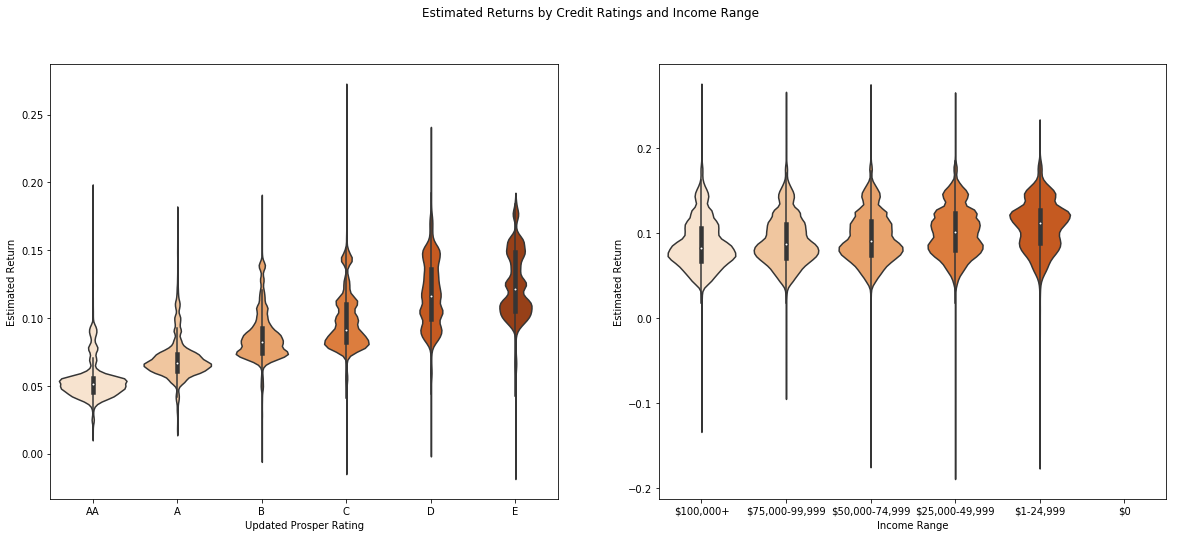

In [42]:
#plot the relation between Estimated Return and Credit Rating, and Estimated Return and Income Range
plt.figure(figsize = [20, 8])

plt.subplot(1, 2, 1)
sns.violinplot(data=loan_df, x='UpdatedProsperRating', y='EstimatedReturn', palette='Oranges')
plt.ylabel('Estimated Return')
plt.xlabel('Updated Prosper Rating')
plt.xticks(rotation=0);

plt.subplot(1, 2, 2)
sns.violinplot(data=loan_df, x='IncomeRange', y='EstimatedReturn', palette='Oranges')
plt.ylabel('Estimated Return')
plt.xlabel('Income Range')
plt.xticks(rotation=0);

plt.suptitle('Estimated Returns by Credit Ratings and Income Range');

The positive correlation between borrower APR and Estimated Return is shown evidently here too. 

Similar to the Borrower APR, we notice that the worse the credit rating, the greater the median estimated returns. Additionally, the lower the income range of the borrower, the greater the median estimated returns. 

We would next explore the relationship between the Credit Ratings and the Income Range to understand if it can shed more insight on our recent observation

### Qualitative vs. Qualitative

We would now seek to explore the relationship between the credit rating and the income range

In [43]:
# Use group_by() and size() to get the number of each combination of the two variable levels as a pandas Series
ct_counts = loan_df.groupby(['UpdatedProsperRating', 'IncomeRange']).size()

ct_counts

UpdatedProsperRating  IncomeRange   
AA                    $100,000+         1765
                      $75,000-99,999    1188
                      $50,000-74,999    1439
                      $25,000-49,999     685
                      $1-24,999           74
A                     $100,000+         3381
                      $75,000-99,999    2803
                      $50,000-74,999    4416
                      $25,000-49,999    2805
                      $1-24,999          300
B                     $100,000+         3212
                      $75,000-99,999    2855
                      $50,000-74,999    4611
                      $25,000-49,999    3509
                      $1-24,999          444
C                     $100,000+         2724
                      $75,000-99,999    2939
                      $50,000-74,999    5609
                      $25,000-49,999    4911
                      $1-24,999          707
D                     $100,000+         1566
                  

In [44]:
# Use Series.reset_index() to convert a series into a dataframe object
ct_counts = ct_counts.reset_index(name='count')

In [45]:
# Use DataFrame.pivot() to rearrange the data
ct_counts = ct_counts.pivot(index ='IncomeRange', columns = 'UpdatedProsperRating', values = 'count')

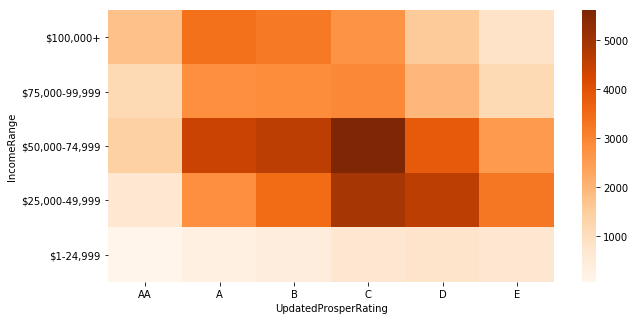

In [46]:
#plot the relation between Income Range and Credit Rating
plt.figure(figsize = [10, 5])
sns.heatmap(ct_counts, cmap = "Oranges");

Although there are other variables that might affect the relationship between income range and credit rating, from our heat map above, we observe that higher income ranges are generally associated with better credit ratings and smaller income ranges proportionally correlate with lower credit ratings. 

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> We identified a strong positive correlation of 0.8, between the Borrower APR and the Estimated Returns. The higher the Borrower APR, the more likely Prosper Loans LLC was expected to make returns on Loans given to Borrowers.

> We noted that the worse the credit rating, the greater the median Borrower APR. Additionally, the lower the income range of the borrower, the greater the median Borrower APR. This trend was similar with Estimated Returns too. We asserted that this could imply that the lower the income range of the borrower, and the worse the credit rating, the higher the risk of the loan and therefore, the higher interest rate which may lead to an increase in Borrower APR or Estimated Returns.

> This possibly explains why more loans were given out to borrowers with worse credit ratings when we explored the univariate distribution of our combined credit ratings. It is likely Prosper Loans gave out more high risk loans with the view of making more Returns from there.

> Finally, we noted a very weak correlation between Debt to Income ratio against both Borrower APR and Estimated Returns 

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Although there are other variables that might affect the relationship between income range and credit rating, from our heat map, we observed that higher income ranges were generally associated with better credit ratings and smaller income ranges proportionally correlate with lower credit ratings.

## Multivariate Exploration

> In this section we create plots of three or more variables to investigate the dataset even further.

We first seek to understand the Impact Income Ranges have on Loan Estimated Returns and Credit Ratings

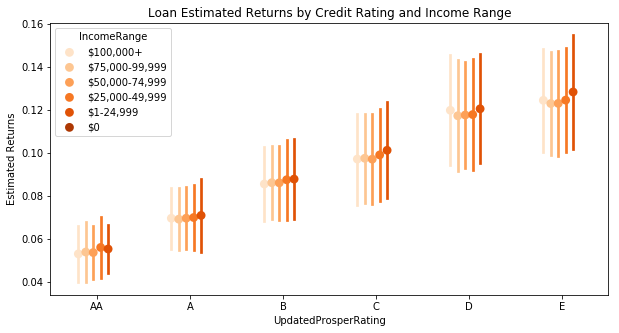

In [47]:
#plot the relation between Estimated Return, Credit Rating and Income Range
fig = plt.figure(figsize = [10,5])
ax = sns.pointplot(data = loan_df, x = 'UpdatedProsperRating', y = 'EstimatedReturn', hue = 'IncomeRange',
           palette = 'Oranges', linestyles = '', dodge = 0.4, ci='sd')
plt.title('Loan Estimated Returns by Credit Rating and Income Range')
plt.ylabel('Estimated Returns')
ax.set_yticklabels([],minor = True);

In the graph above, we continue to see that lower credit ratings, and lower income correlate to higher returns. It's interesting to see that the income range does not play a big influence on the estimated returns by credit rating category.

The trend, however, is slightly distorted by with the D and E credit ratings where incomes of 100,000+ seem to have higher estimated returns that the lower income ranges. 

We would now explore if the loan term has signifact impact on Estimated Returns with regards to Credit Ratings and Income Ranges

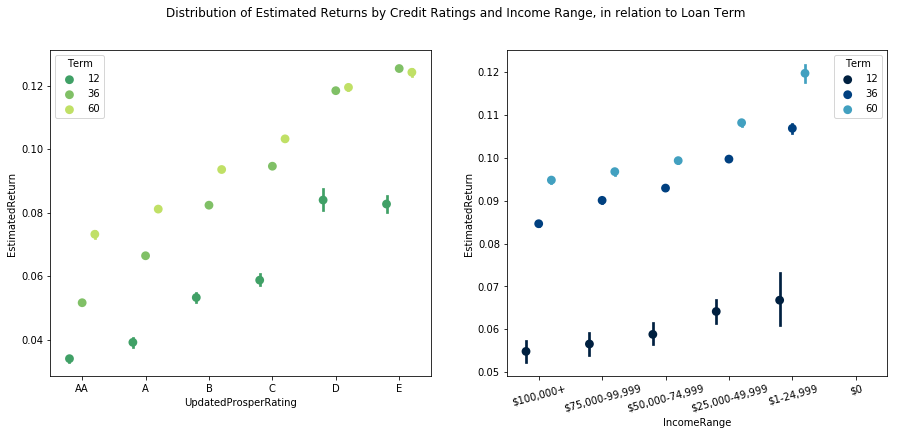

In [48]:
#plot the relation between Estimated Return, Credit Rating and Loan Term
plt.figure(figsize = [15, 6])

plt.subplot(1, 2, 1)
sns.pointplot(data = loan_df, x = 'UpdatedProsperRating', y = 'EstimatedReturn', hue = 'Term',
           palette = 'summer', linestyles = '', dodge = 0.4)
plt.xticks(rotation=0);

plt.subplot(1, 2, 2)
sns.pointplot(data = loan_df, x = 'IncomeRange', y = 'EstimatedReturn', hue = 'Term',
           palette = 'ocean', linestyles = '', dodge = 0.4)
plt.xticks(rotation=15);

plt.suptitle('Distribution of Estimated Returns by Credit Ratings and Income Range, in relation to Loan Term');

From the plots above, loan term does not have significant impact on the distribution of Income Ranges and Credit Ratings in relation to Estimated Returns. 

The general trend seems to indicate that longer loan terms correlate with higher returns and longer loan terms might be deemed riskier loans. The trend is only disrupted for the credit rating E where a shorter loan term of 36 months has slightly more estimated returns than the loan term of 12 months

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?  Were there any interesting or surprising interactions between features?

> In this section, we tried to explore the effect Income Ranges have on Loan Estimated Returns and Credit Ratings. We continued to see that lower credit ratings, and lower income correlated to higher returns. It was interesting to noted that the income range did not play a big influence on the estimated returns by credit rating category.

> Additonally, the loan term also did not have any significant impact on on the distribution of Income Ranges and Credit Ratings in relation to Estimated Returns

## Conclusions
>We sought to explore the impact that the following features, IncomeRange, CreditGrade, Prosperrating (Alpha), Term and DebtToIncomeRatio had on our key variables, BorrowerAPR and Estimatedreturn. 

>We began by exploring the distribution of each feature listed and the key variables through univariate explorations. We then performed bivariate explorations between the features and key variables to identify the relationships between the features and key variables. Key among our observations were:
1. We identified a strong positive correlation of 0.8 between the Borrower APR and the Estimated Returns. The higher the Borrower APR, the more likely Prosper Loans LLC was expected to make returns on Loans given to Borrowers.
2. We noted that the worse the credit rating, the greater the median Borrower APR. Additionally, the lower the income range of the borrower, the greater the median Borrower APR. This trend was similar with Estimated Returns too. We asserted that this could imply that the lower the income range of the borrower, and the worse the credit rating, the higher the risk of the loan and therefore, the higher interest rate which may lead to an increase in Borrower APR or Estimated Returns.

> We finally performed multivariate explorations on our features of interest and key variables to ascertain more interactions between our key variables and features however we did not notice any major surprising relationships
